## The dataset can be downloaded from 
https://rb.gy/pcyqx0

### ABOUT THE DATASET
**This dataset contains roughly 3000 Amazon customer reviews (input text), star ratings, date of review, variation, and feedback of different Amazon Alexa goods such as Alexa Echo, Echo dots, Alexa Firesticks, and so on for learning how to train Machine for sentiment analysis.**

### WHAT CAN BE DONE WITH THE DATA

**This data may be used to study Amazon's Alexa product, uncover insights within user evaluations, and aid with machine learning models.
It'salso possible to train machine models for sentiment analysis and evaluate consumer feedback. How many favorable reviews are there? How many bad reviews are there?**

In [132]:
#Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

%matplotlib inline 

In [133]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
sns.set_palette("bright")

### IMPORTING DATASET (from local directory)

In [135]:

df= pd.read_csv("amazon_alexa.tsv", sep="\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [136]:
df.shape

(3150, 5)

In [137]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [138]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [140]:
df["rating"].unique()

array([5, 4, 3, 2, 1])

In [141]:
df["verified_reviews"][0:5]

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

#### Converting date attribute string to datetime datatype for analysis

In [142]:
df["date"]= pd.to_datetime(df["date"])
df["date"][0]

Timestamp('2018-07-31 00:00:00')

In [143]:
dates= df["date"]

only_dates=[]

for date in dates:
    only_dates.append(date.date())
    
df["only_dates"]= only_dates
df["only_dates"][0]

datetime.date(2018, 7, 31)

### Feature engineering

#### Extracting Year, month, day of the week from date
* We will use these featurees later in the model
* We will extract year, month and day of the week from days columns

In [144]:
only_year=[]

for date in dates:
    only_year.append(date.year)
df['year']= only_year


only_month=[]

for date in dates:
    only_month.append(date.month)
df["month"]= only_month


only_weekday=[]
#1--> Monday
#7--> Sunday

for date in dates:
    only_weekday.append(date.isoweekday())
df["day_of_week"]= only_weekday


In [145]:
df.head()

,rating,date,variation,verified_reviews,feedback,only_dates,year,month,day_of_week
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,2018-07-31,2018,7,2
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2018-07-31,2018,7,2
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018-07-31,2018,7,2
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018-07-31,2018,7,2
4,5,2018-07-31,Charcoal Fabric,Music,1,2018-07-31,2018,7,2


### Calculating the length of he review
* calculating the length of the review proves to be an important feature in NLP classification

In [146]:
reviews= df["verified_reviews"]

len_review=[]

for review in reviews:
    len_review.append(len(review))
    
df["len_of_reviews"]= len_review

In [147]:
df['len_of_reviews'][0], df['verified_reviews'][0]

(13, 'Love my Echo!')

In [148]:
### Updated column list:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'only_dates', 'year', 'month', 'day_of_week', 'len_of_reviews'],
      dtype='object')

In [149]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
only_dates          0
year                0
month               0
day_of_week         0
len_of_reviews      0
dtype: int64

In [150]:
rating_count=df.groupby("rating").size().to_frame().reset_index()  #df.groupby(" rating").count()["date"]

In [151]:
rating_count.rename(columns={0:"count"},inplace=True)

rating_count.head()


,rating,count
0,1,161
1,2,96
2,3,152
3,4,455
4,5,2286


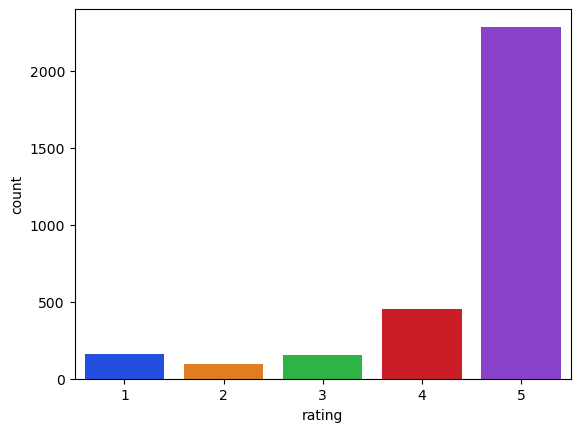

In [152]:
sns.barplot(x="rating", y="count", data= rating_count);

In [153]:
"""
it is clear from the above graph that the number of 5 rating review is highest in this dataset
"""

'\nit is clear from the above graph that the number of 5 rating review is highest in this dataset\n'

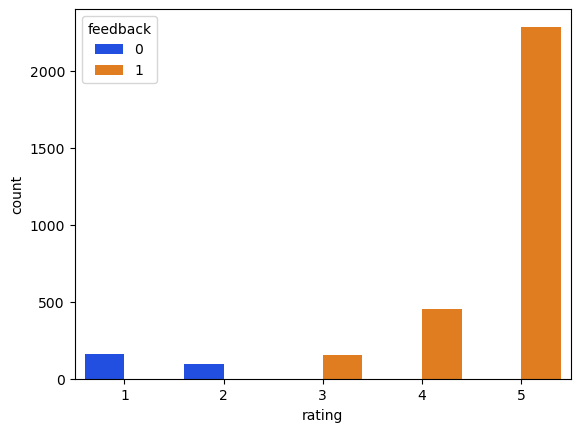

In [154]:
#Plotting rating with "feedback" as hue 

sns.countplot(x="rating",hue="feedback", data=df);

In [155]:
"""It can be inferred that most of the reviews with rating < 3 result in a bad experice foe the customers"""

'It can be inferred that most of the reviews with rating < 3 result in a bad experice foe the customers'

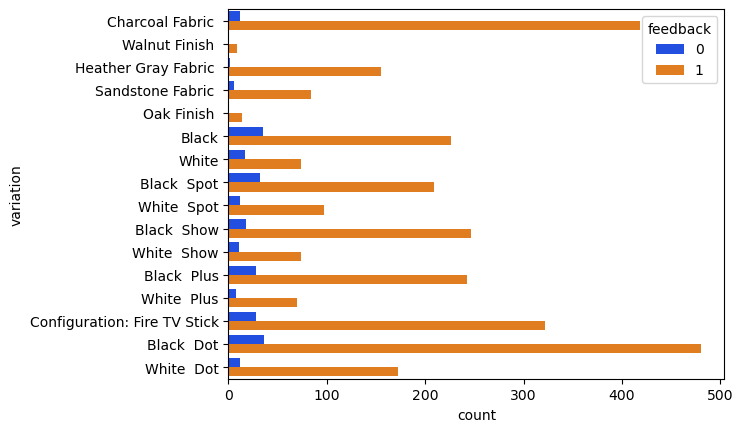

In [156]:
##Plotting rating with variant of the product

#plt.figure(figsize=(2,7))
sns.countplot(y="variation",hue="feedback", data= df);

In [157]:
"""It can be observed from above visualization that the variant:"black dot" is the product withmost number of positive  feedbacks""" 

'It can be observed from above visualization that the variant:"black dot" is the product withmost number of positive  feedbacks'

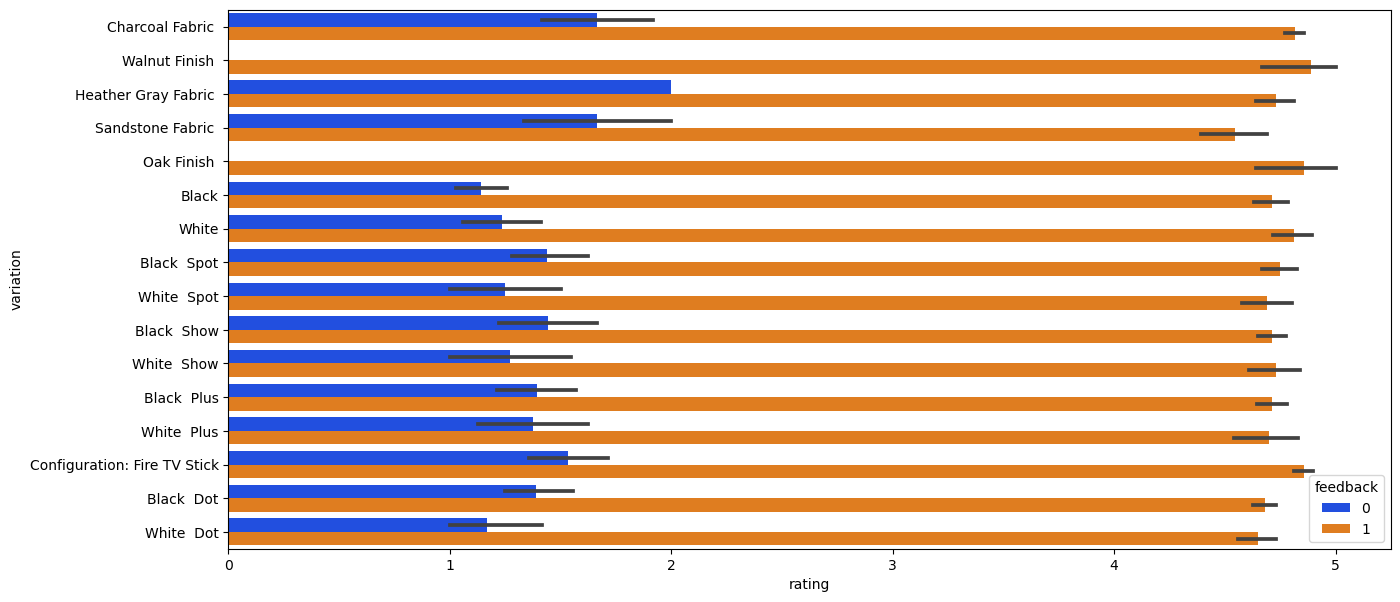

In [158]:
plt.figure(figsize=(15,7))
sns.barplot(x="rating",y="variation",hue="feedback", data= df);

In [159]:
"""From teh above plot it can be inferred that average rating of all the products with positive (1) feedback is 
close to 4.5"""

'From teh above plot it can be inferred that average rating of all the products with positive (1) feedback is \nclose to 4.5'

In [160]:
df["len_of_reviews"].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: len_of_reviews, dtype: float64

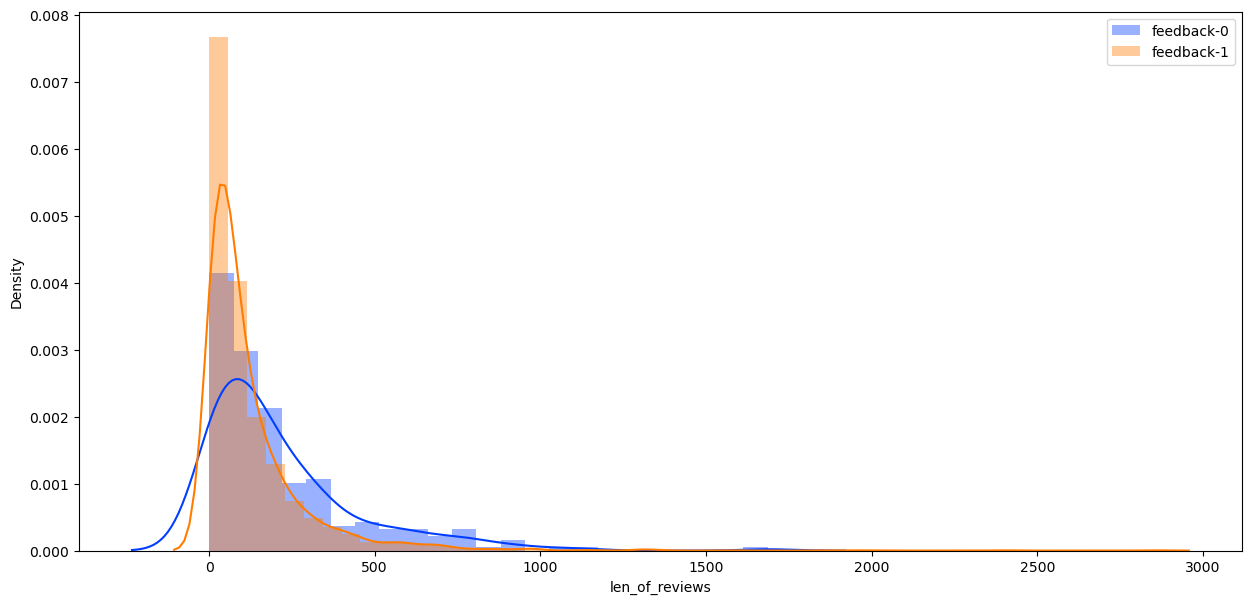

In [161]:
plt.figure(figsize=(15,7))
sns.distplot(df[df["feedback"]==0]["len_of_reviews"],label="feedback-0")
sns.distplot(df[df["feedback"]==1]["len_of_reviews"],label="feedback-1")
plt.legend()
plt.show()
           

In [162]:
"""It can be observed form the above plot that even though there are comparatively less negative(0) feebacks
but they longer reviews correlate more with negative than positive reviews"""

'It can be observed form the above plot that even though there are comparatively less negative(0) feebacks\nbut they longer reviews correlate more with negative than positive reviews'

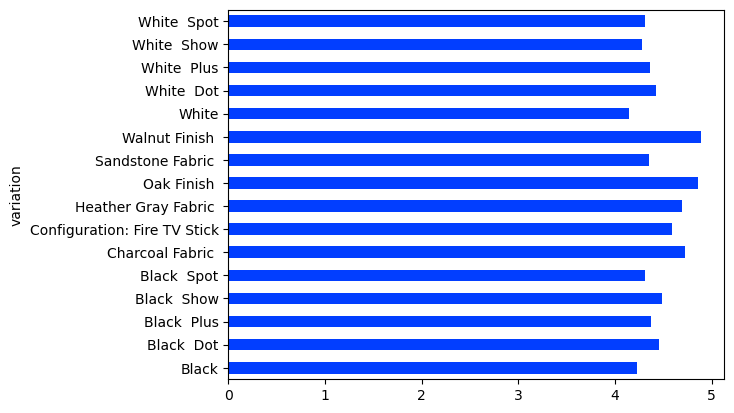

In [163]:
gps=df.groupby("variation")["rating"].mean()

gps.plot(kind="barh");

In [164]:
"""The above plot shows average rating of each variant irrespective of positive or negative rating """

'The above plot shows average rating of each variant irrespective of positive or negative rating '

In [165]:
## Correlation coefficient

columns=['rating']
for col in range(len(columns)):
    
    print("correlation of target and "+ str(columns[col]) +" is:",df[str(columns[col])].corr(df["feedback"]))

correlation of target and rating is: 0.8619684854581505


In [166]:

print("correlation between feeback and review column is",df[str(columns[col])].corr(df["feedback"]))

correlation between feeback and review column is 0.8619684854581505


In [167]:
for col in range(len(columns)):
    print(df[str(columns[col])])

0       5
1       5
2       4
3       5
4       5
       ..
3145    5
3146    5
3147    5
3148    5
3149    4
Name: rating, Length: 3150, dtype: int64


In [168]:
for col in range(len(columns)):
    print(df["feedback"])

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


In [169]:
df.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            object
feedback                     int64
only_dates                  object
year                         int64
month                        int64
day_of_week                  int64
len_of_reviews               int64
dtype: object

## Data cleaning

In [170]:
df["verified_cleaned_reviews"]= df["verified_reviews"].str.replace("[^a-zA-Z0=9]"," ")  #Replace all text i.e not alphanumeric with " "
df["verified_cleaned_reviews"].head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My   ...
4                                                Music
Name: verified_cleaned_reviews, dtype: object

In [171]:
df["verified_reviews"].iloc[10], df["verified_cleaned_reviews"].iloc[10]

('I sent it to my 85 year old Dad, and he talks to it constantly.',
 'I sent it to my    year old Dad  and he talks to it constantly ')

In [172]:
#Remove words with len < 3 

df["verified_cleaned_reviews"]=df["verified_cleaned_reviews"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3 ]))
df["verified_cleaned_reviews"].head()

0                                            Love Echo
1                                                Loved
2    Sometimes while playing game answer question c...
3    have with this thing learns about dinosaurs co...
4                                                Music
Name: verified_cleaned_reviews, dtype: object

In [173]:
# Remove stoppinng words
from nltk.corpus import stopwords

stop = stopwords.words('english')
df["reviews_no_stopwords"]= df["verified_cleaned_reviews"].apply(lambda x: " ".join([w for w in x.split() if w not in stop]))

In [174]:
#tokenizing the text

tokenized_text= df["verified_cleaned_reviews"].apply(lambda x: x.split())
tokenized_text.head()

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, while, playing, game, answer, ques...
3    [have, with, this, thing, learns, about, dinos...
4                                              [Music]
Name: verified_cleaned_reviews, dtype: object

In [175]:
#porter stemmer 
from nltk.stem.porter import *

stemmer= PorterStemmer()

tokenized_reviews= tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_reviews.head()

0                                         [love, echo]
1                                               [love]
2    [sometim, while, play, game, answer, question,...
3    [have, with, thi, thing, learn, about, dinosau...
4                                              [music]
Name: verified_cleaned_reviews, dtype: object

In [176]:
## Stitching abck the tokens 

for i in range(len(tokenized_reviews)):
    tokenized_reviews[i]= " ".join(tokenized_reviews[i])
    
df["tidy_review"]= tokenized_reviews
df["tidy_review"].head()

0                                            love echo
1                                                 love
2    sometim while play game answer question correc...
3    have with thi thing learn about dinosaur contr...
4                                                music
Name: tidy_review, dtype: object

#### At this stage we will explore and visualize the dataset for most frequent words
* What are the most common words in the dataset fir negative and positive reviews, respectively.
* Which trends are sassociated with the dataset


#### A. Understanding the most common words used in the reviews: wordcloud

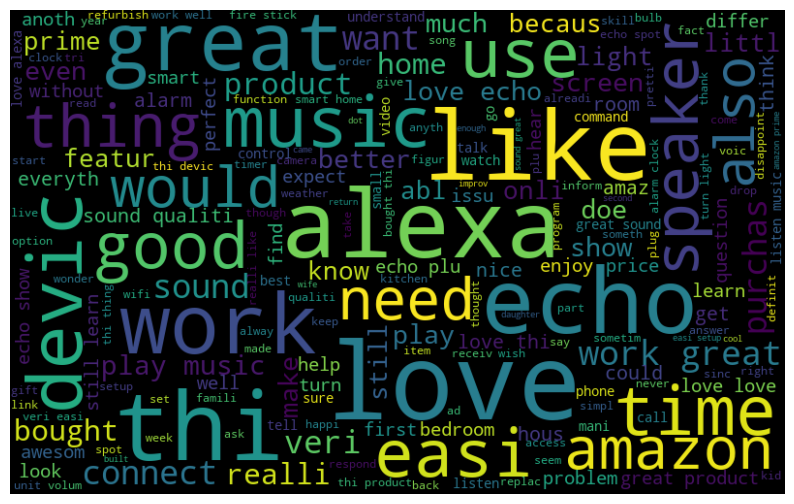

In [177]:
all_words= " ".join([text for text in df["tidy_review"]])

from wordcloud import WordCloud
wordcloud= WordCloud(stopwords= stop,width=800, height= 500, random_state=21, max_font_size= 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,  interpolation="bilinear")
plt.axis("off")
plt.show()

#### B. Words in negative reviews

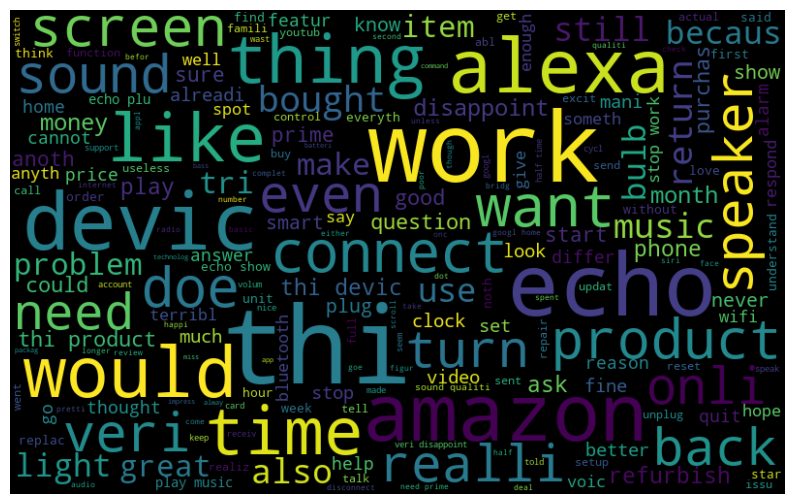

In [178]:
normal_words= " ".join([text for text in df["tidy_review"][df["feedback"]==0]])

wordcloud = WordCloud(stopwords=stop,width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


#### C. Words in positive reviews

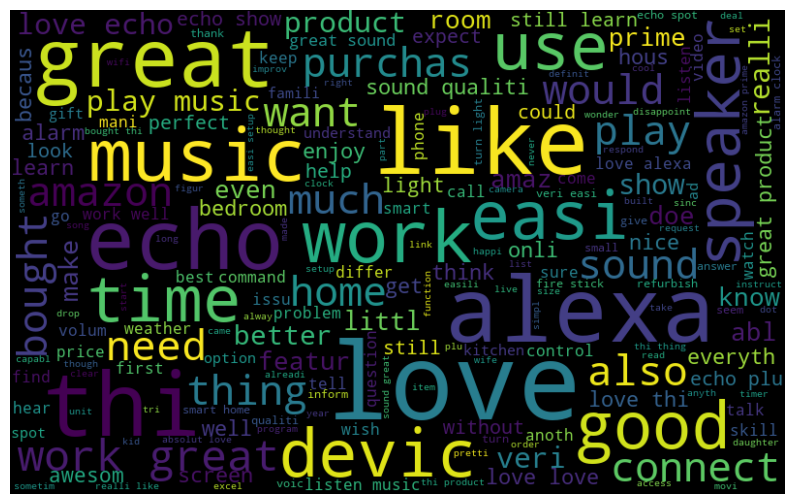

In [179]:
normal_words= " ".join([text for text in df["tidy_review"][df["feedback"]==1]])

wordcloud = WordCloud(stopwords= stop,width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


#### Notice all the positive words popping up for positive reviews whereas, negative words pop up more for negative reviews apart from the device name and certain other frequently occuring words


In [60]:
df.head()

,rating,date,variation,verified_reviews,feedback,only_dates,year,month,day_of_week,len_of_reviews,verified_cleaned_reviews,reviews_no_stopwords,tidy_review
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,2018-07-31,2018,7,2,13,Love Echo,Love Echo,love echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2018-07-31,2018,7,2,9,Loved,Loved,love
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018-07-31,2018,7,2,195,Sometimes while playing game answer question c...,Sometimes playing game answer question correct...,sometim while play game answer question correc...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018-07-31,2018,7,2,172,have with this thing learns about dinosaurs co...,thing learns dinosaurs control lights play gam...,have with thi thing learn about dinosaur contr...
4,5,2018-07-31,Charcoal Fabric,Music,1,2018-07-31,2018,7,2,5,Music,Music,music


In [77]:
## Extract necessary columns for one hot encoding and modelling
data=df[["rating","variation","tidy_review","feedback"]]

data["rating"]= data["rating"].astype("object")

ohe_cols=pd.get_dummies(data[["rating", "variation"]])
data.drop(["rating","variation"], axis=1,inplace=True)
data=pd.concat([data,ohe_cols], axis=1)
#ohe_cols

data.head()

,tidy_review,feedback,rating_1,rating_2,rating_3,rating_4,rating_5,variation_Black,variation_Black Dot,variation_Black Plus,...,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,love echo,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,love,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sometim while play game answer question correc...,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,have with thi thing learn about dinosaur contr...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,music,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data.columns

Index(['tidy_review', 'feedback', 'rating_1', 'rating_2', 'rating_3',
       'rating_4', 'rating_5', 'variation_Black', 'variation_Black  Dot',
       'variation_Black  Plus', 'variation_Black  Show',
       'variation_Black  Spot', 'variation_Charcoal Fabric ',
       'variation_Configuration: Fire TV Stick',
       'variation_Heather Gray Fabric ', 'variation_Oak Finish ',
       'variation_Sandstone Fabric ', 'variation_Walnut Finish ',
       'variation_White', 'variation_White  Dot', 'variation_White  Plus',
       'variation_White  Show', 'variation_White  Spot'],
      dtype='object')

In [79]:
data.shape

(3150, 23)

In [80]:
data.describe()

,feedback,rating_1,rating_2,rating_3,rating_4,rating_5,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,...,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,...,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,0.918413,0.051111,0.030476,0.048254,0.144444,0.725714,0.082857,0.163810,0.085714,0.084127,...,0.111111,0.049841,0.004444,0.028571,0.002857,0.028889,0.058413,0.024762,0.026984,0.034603
std,0.273778,0.220259,0.171921,0.214336,0.351596,0.446224,0.275710,0.370161,0.279986,0.277622,...,0.314320,0.217651,0.066529,0.166625,0.053384,0.167521,0.234559,0.155423,0.162063,0.182802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer()
reviews_countvectorizer= vectorizer.fit_transform(data["tidy_review"])

In [82]:
reviews_countvectorizer.shape

(3150, 2606)

In [83]:
type(reviews_countvectorizer)

scipy.sparse.csr.csr_matrix

In [84]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [85]:
reviews= pd.DataFrame(reviews_countvectorizer.toarray())
data= pd.concat([data, reviews], axis=1)

In [86]:
data.shape

(3150, 2629)

In [88]:
data.drop(["tidy_review"],axis=1, inplace=True)

In [89]:
data.shape

(3150, 2628)

In [90]:
data.columns

Index([             'feedback',              'rating_1',
                    'rating_2',              'rating_3',
                    'rating_4',              'rating_5',
             'variation_Black',  'variation_Black  Dot',
       'variation_Black  Plus', 'variation_Black  Show',
       ...
                          2596,                    2597,
                          2598,                    2599,
                          2600,                    2601,
                          2602,                    2603,
                          2604,                    2605],
      dtype='object', length=2628)

### Modelling

In [91]:
#Shuffle samples
df_shuffle= data.sample(frac=1, random_state= 12).reset_index(drop=True)

In [93]:
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [94]:
X= df_shuffle
y= df_shuffle.pop("feedback")


#Split into train and test 
X_train, X_test, y_train, y_test= skms.train_test_split(X,y, train_size=0.7, random_state=12)

print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 2205 records out of 3150 which is 70%
Test set has 945 records out of 3150 which is 30%


In [97]:
smote= SMOTE()

X_train.columns = X_train.columns.astype(str)
y_train = y_train.astype(str)



X_over, y_over= smote.fit_resample(X_train, y_train)

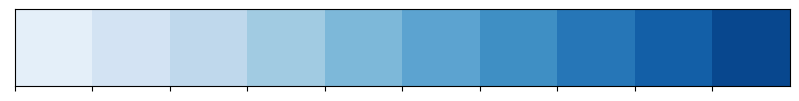

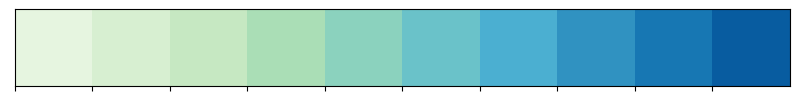

In [101]:
sns.color_palette("Blues", as_cmap=True)
GnBu_palette = sns.color_palette("GnBu",10)
Blues_palette = sns.color_palette("Blues",10)
sns.palplot(Blues_palette)
sns.palplot(GnBu_palette)

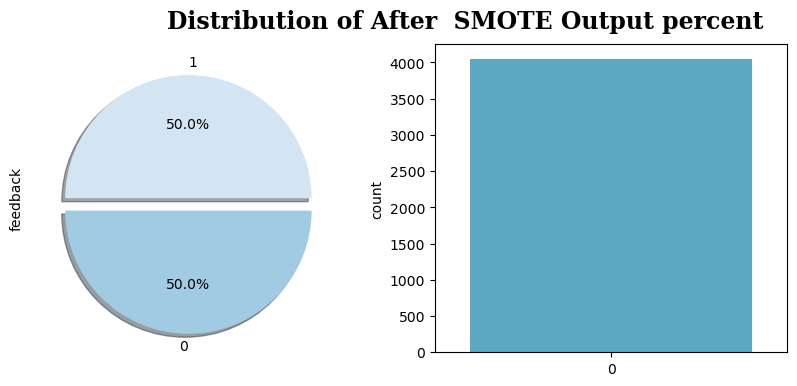

In [102]:
fig, axes= plt.subplots(1,2,figsize=(10,4))

y_over.value_counts().plot.pie(
    explode=[0,0.1], autopct="%1.1f%%", ax= axes[0], shadow=True, colors=[Blues_palette[1],Blues_palette[3]])

sns.countplot(y_over, ax=axes[1], palette=[GnBu_palette[6],GnBu_palette[7]])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of After  SMOTE Output percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()


In [130]:
## Evaluation functions definition

def get_clf_eval(y_test, pred= None, pred_proba= None):
    y_test = y_test.astype(str)
    
    confusion= confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred, pos_label='1')
    recall= recall_score(y_test, pred, pos_label="1")
    f1= f1_score(y_test, pred, pos_label='1')
    roc_auc= roc_auc_score(y_test, pred_proba)  
    
    print('confusion')
    print(confusion)
    print('accuracy : {}'.format(np.around(accuracy,4)))
    print('precision: {}'.format(np.around(precision,4)))
    print('recall : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))

### Logistic Regresion model


In [131]:

X_test.columns = X_test.columns.astype(str)
y_test = y_test.astype(str)

lg_reg= LogisticRegression()

lg_reg.fit(X_train, y_train)
pred= lg_reg.predict(X_test)
pred_proba= lg_reg.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[ 76   0]
 [  0 869]]
accuracy : 1.0
precision: 1.0
recall : 1.0
F1 : 1.0
ROC_AUC : 1.0


In [125]:
y_test.dtype

dtype('O')

### Model without smote using only the review column and LogisticRegressionCV

In [228]:
df1= df[["verified_reviews", "feedback"]]
df1.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [229]:
#importing re library 
import re
#Defining preprocessing function to process the data
def preprocess(text):
        text=re.sub('<[^>]*>','',text)
        text= text.split()
        temp=[x for x in text if len(x)>2]
        text=" ".join(temp)
        emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
        text=re.sub('[\W]+',' ',text.lower()) +' '.join(emoji).replace('-','')
        return text   

In [230]:
df1["verified_reviews"]= df1["verified_reviews"].apply(preprocess)
df1.head()

,verified_reviews,feedback
0,love echo,1
1,loved it,1
2,sometimes while playing game you can answer qu...,1
3,have had lot fun with this thing old learns ab...,1
4,music,1


In [231]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
#Defining function for Tokenizer porter
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(strip_accents=None,preprocessor=None,lowercase=False,use_idf=True,norm='l2',tokenizer=tokenizer_porter,smooth_idf=True)
y=df1.feedback.values
#scaling the data
x=tfid.fit_transform(df1.verified_reviews)

In [233]:
x.shape, y.shape

((3150, 2918), (3150,))

In [236]:
#splitting the train and test split using train_test_split function of sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3,shuffle=False)

In [ ]:
#Importing Logisitic RegressionCV from sklearn library
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = model.predict(X_test)

In [238]:
#Importing metrics from sklesrn to calculate accuracy
from sklearn import metrics
# Accuracy of our built model
print("Accuracy of our model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of our model: 0.9396825396825397


In [249]:
test=["It works as depicted on the cover","I will love to keep it" ]
test_vec= tfid.transform(test)
model.predict(test_vec)

array([1, 1])

In [246]:
test=["It does not works as depicted on the cover","I want to return it"]
test_vec= tfid.transform(test)
model.predict(test_vec)

array([0, 0])

### There are some key collection of words that show as negative instead of positive and vice-versa